Generated Dataset:
      age       job_type income_level credit_history loanamount loan_approved
0  senior       salaried       medium            bad       high            no
1   young  self_employed       medium           good        low           yes
2  senior       salaried          low           good       high            no
3  senior  self_employed          low            bad     medium            no
4   young  self_employed       medium           good        low           yes

Decision Tree Model Evaluation:
Accuracy: 0.8333
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.79      0.90      0.84        29

    accuracy                           0.83        60
   macro avg       0.84      0.84      0.83        60
weighted avg       0.84      0.83      0.83        60


Random Forest Model Evaluation:
Accuracy: 0.8167
Classification Report:
              precision    recall  f1-sc

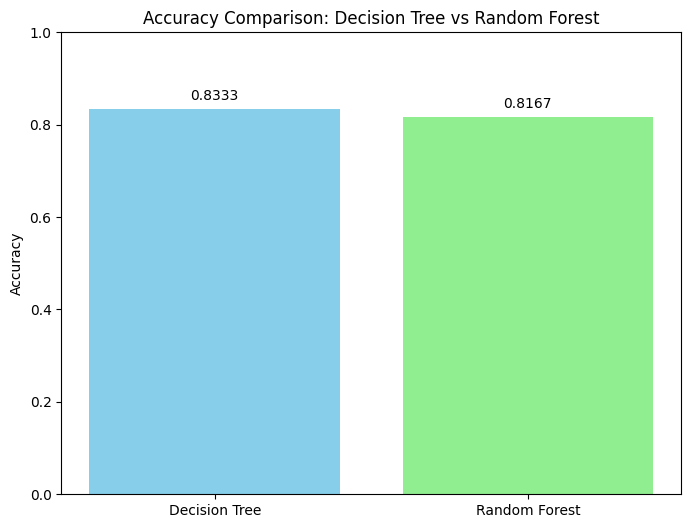

In [3]:
import pandas as pd
import numpy as np

np.random.seed(42)

n_samples = 200

data = pd.DataFrame({
    'age': np.random.choice(['young', 'middle-aged', 'senior'], size=n_samples),
    'job_type': np.random.choice(['salaried', 'self_employed', 'unemployed'], size=n_samples),
    'income_level': np.random.choice(['high', 'medium', 'low'], size=n_samples),
    'credit_history': np.random.choice(['good', 'bad'], size=n_samples),
    'loanamount': np.random.choice(['high', 'medium', 'low'], size=n_samples),
})

def determine_loan_approval(row):
    score = 0
    if row['age'] == 'middle-aged': score += 2
    if row['job_type'] == 'salaried': score += 2
    if row['income_level'] in ['high', 'medium']: score += 2
    if row['credit_history'] == 'good': score += 3
    if row['loanamount'] in ['low', 'medium']: score += 2


    if np.random.rand() < 0.1:
        score = 10 - score

    return 'yes' if score >= 6 else 'no'

data['loan_approved'] = data.apply(determine_loan_approval, axis=1)

print("Generated Dataset:")
print(data.head())


data_encoded = pd.get_dummies(data, columns=['age', 'job_type', 'income_level', 'credit_history', 'loanamount'], drop_first=True)


data_encoded['loan_approved'] = data_encoded['loan_approved'].map({'yes': 1, 'no': 0})



from sklearn.model_selection import train_test_split

X = data_encoded.drop('loan_approved', axis=1)
y = data_encoded['loan_approved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_report = classification_report(y_test, dt_predictions)

print("\nDecision Tree Model Evaluation:")
print(f"Accuracy: {dt_accuracy:.4f}")
print("Classification Report:")
print(dt_report)


from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the Random Forest model
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {rf_accuracy:.4f}")
print("Classification Report:")
print(rf_report)

# Compare accuracy using plots
import matplotlib.pyplot as plt

models = ['Decision Tree', 'Random Forest']
accuracies = [dt_accuracy, rf_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Decision Tree vs Random Forest')
plt.ylim(0, 1.0)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center')

plt.show()